## Dinámica de un electrón en un DQD. Sistema de dos niveles

In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

%matplotlib widget

## Cálculo numérico

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \epsilon_L & -\tau \\
        -\tau & \epsilon_R
    \end{pmatrix}$

In [2]:
# sabemos que H es hermítico
def hamiltonian_creator(epsL, epsR, tau):
    H = np.zeros((2, 2))
    
    H[0, 0:] = [epsL, -tau]
    H[1, 1:] = [epsR]
 
    H += H.T.conj() - np.diag(np.diag(H))
    
    return H

La evolución del sistema sigue $\ket{\psi(t)}=U(t)\ket{\psi(0)}$, con $U(t)=exp(-iHt)$

In [3]:
# operador evolución temporal
def evolution(H, t):
    #P,D = np.linalg.eigh(-1j*t*H)
    #U = np.matmul(np.matmul(P, np.diag(np.exp(np.diag(D)))),np.linalg.inv(P))
    U = expm(-1j * t * H)
    
    return U

In [4]:
epsL = 2
epsR = 1
tau = 1

H = hamiltonian_creator(epsL, epsR, tau)

L_ket = np.array([[1],[0]])
R_ket = np.array([[0],[1]])

L_bra = np.array([[1,0]])
R_bra = np.array([[0,1]])


initial = L_ket

In [5]:
t = np.linspace(0, 10, 100)
states = []
pL = []
pR = []

for i in range(len(t)):
    state = np.matmul(evolution(H, t[i]),initial)
    states.append(state)
    pL.append(np.linalg.norm(np.matmul(L_bra,state))**2)
    pR.append(np.linalg.norm(np.matmul(R_bra,state))**2)

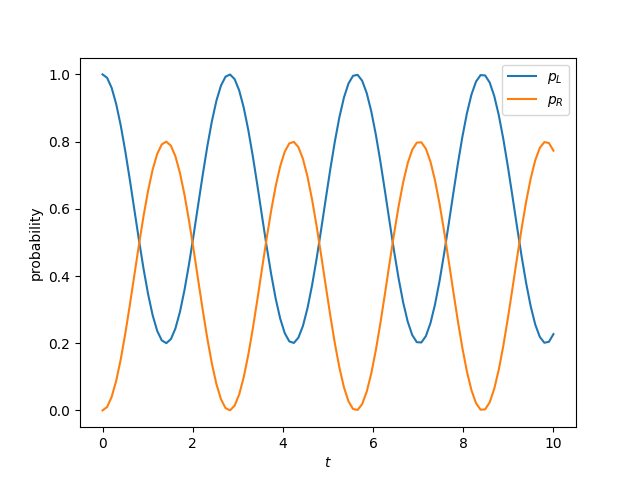

In [6]:
fig, ax = plt.subplots()

ps = [pL, pR]

for pi in ps:
    ax.plot(t, pi)

ax.set_xlabel(r'$t$')
ax.set_ylabel('probability')
ax.legend((r'$p_L$', r'$p_R$'), prop = {'size': 10}, loc='upper right')

## Cálculo analítico

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \delta/2 & \tau \\
        \tau & -\delta/2
    \end{pmatrix}$

Resolviendo el sistema de ecuaciones diferenciales con Mathematica llegamos a 

In [7]:
delta = (epsR-epsL)
w = np.sqrt((delta)**2+4*tau**2)
pL_a = (delta**2+2*tau**2+2*tau**2*np.cos(t*w))/(w**2)
pR_a = -2*tau**2*(-1+np.cos(t*w))/(w**2)

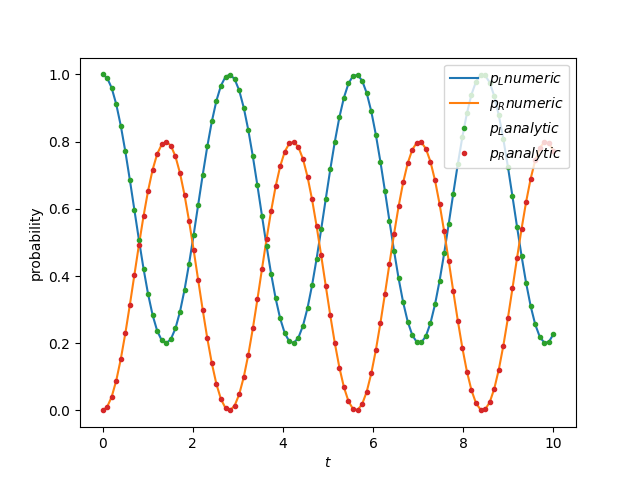

In [8]:
t_a = np.linspace(0, 10, 100)
fig, ax = plt.subplots()

ps = [pL, pR]
ps_ = [pL_a, pR_a]

for pn in ps:
    ax.plot(t, pn)
    
for pa in ps_:
    ax.plot(t_a, pa, '.' )

ax.set_xlabel(r'$t$')
ax.set_ylabel('probability')
plt.legend((r'$p_L numeric$', r'$p_R numeric$', r'$p_L analytic$', r'$p_R analytic$'),
prop = {'size': 10}, loc='upper right')